**Supervised Learning**

First step is EDA

In [1]:
#Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings

In [2]:
df=pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
columns=df.columns
columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [11]:
df.shape

(6362620, 11)

In [12]:
df = df.drop(columns=['step'])

In [14]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


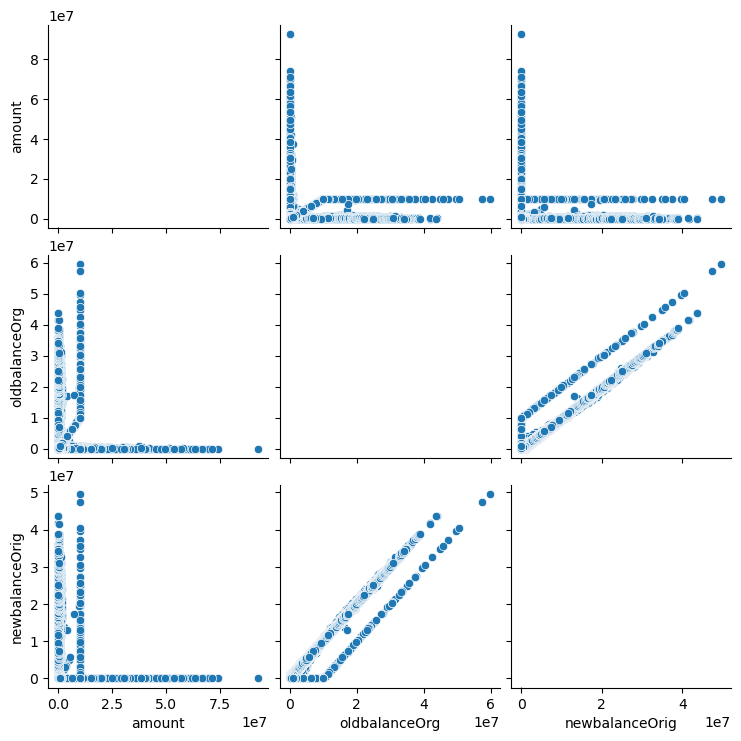

In [15]:
sns.pairplot(df.iloc[:,:5])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


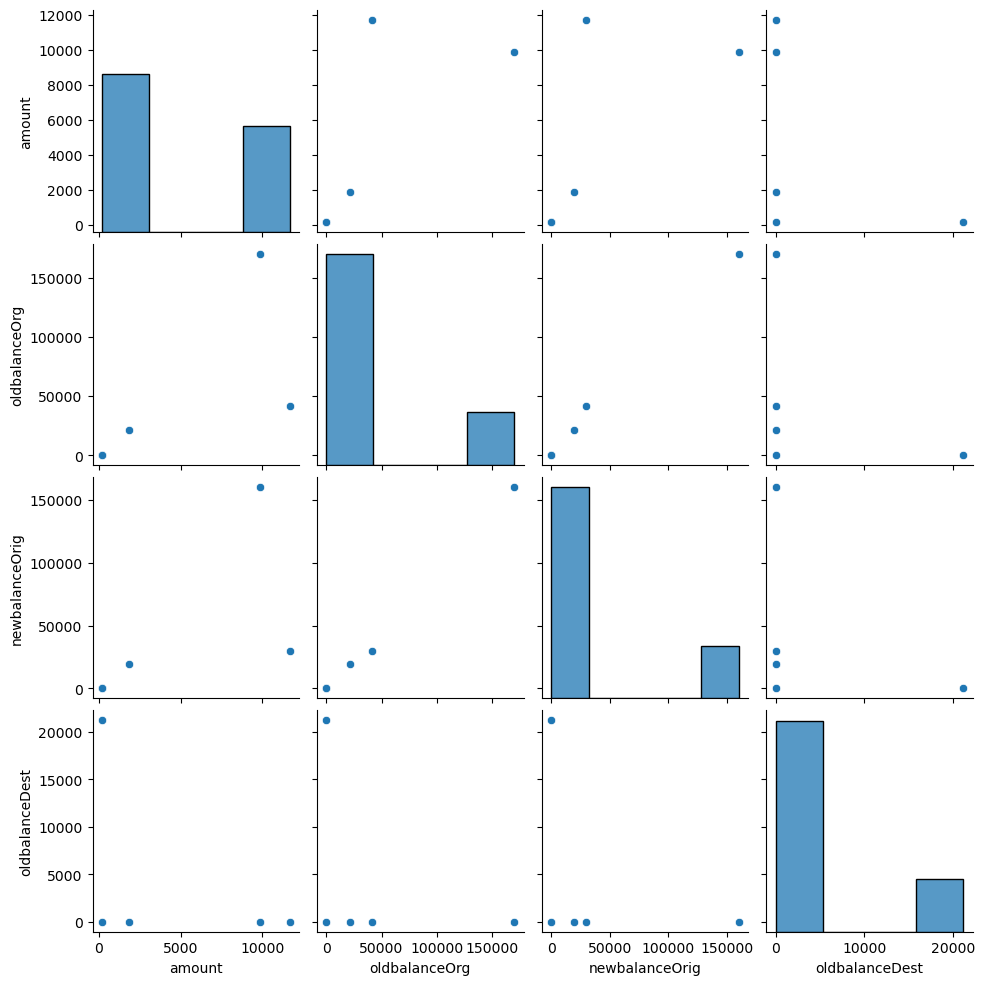

In [16]:
sns.pairplot(df.iloc[:5,:7])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


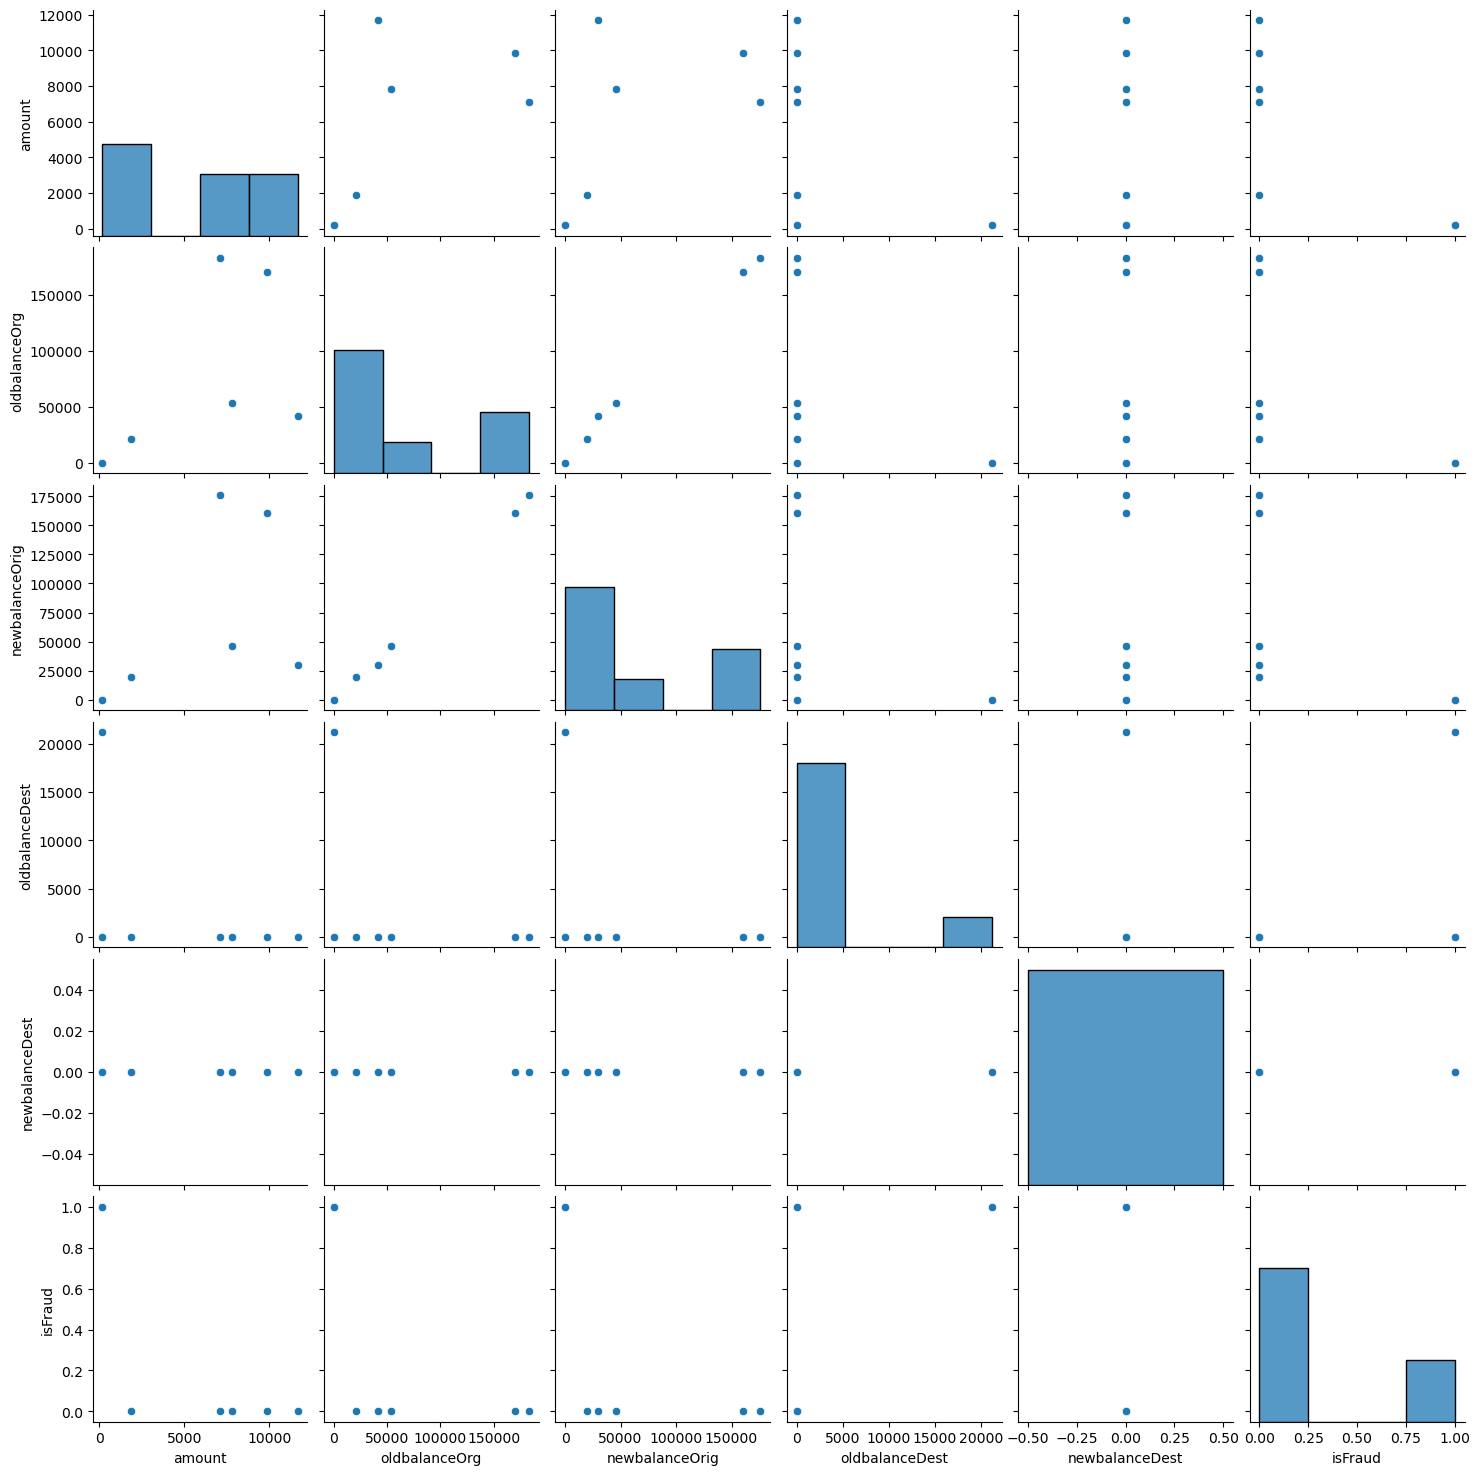

In [17]:
sns.pairplot(df.iloc[:7,:9])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


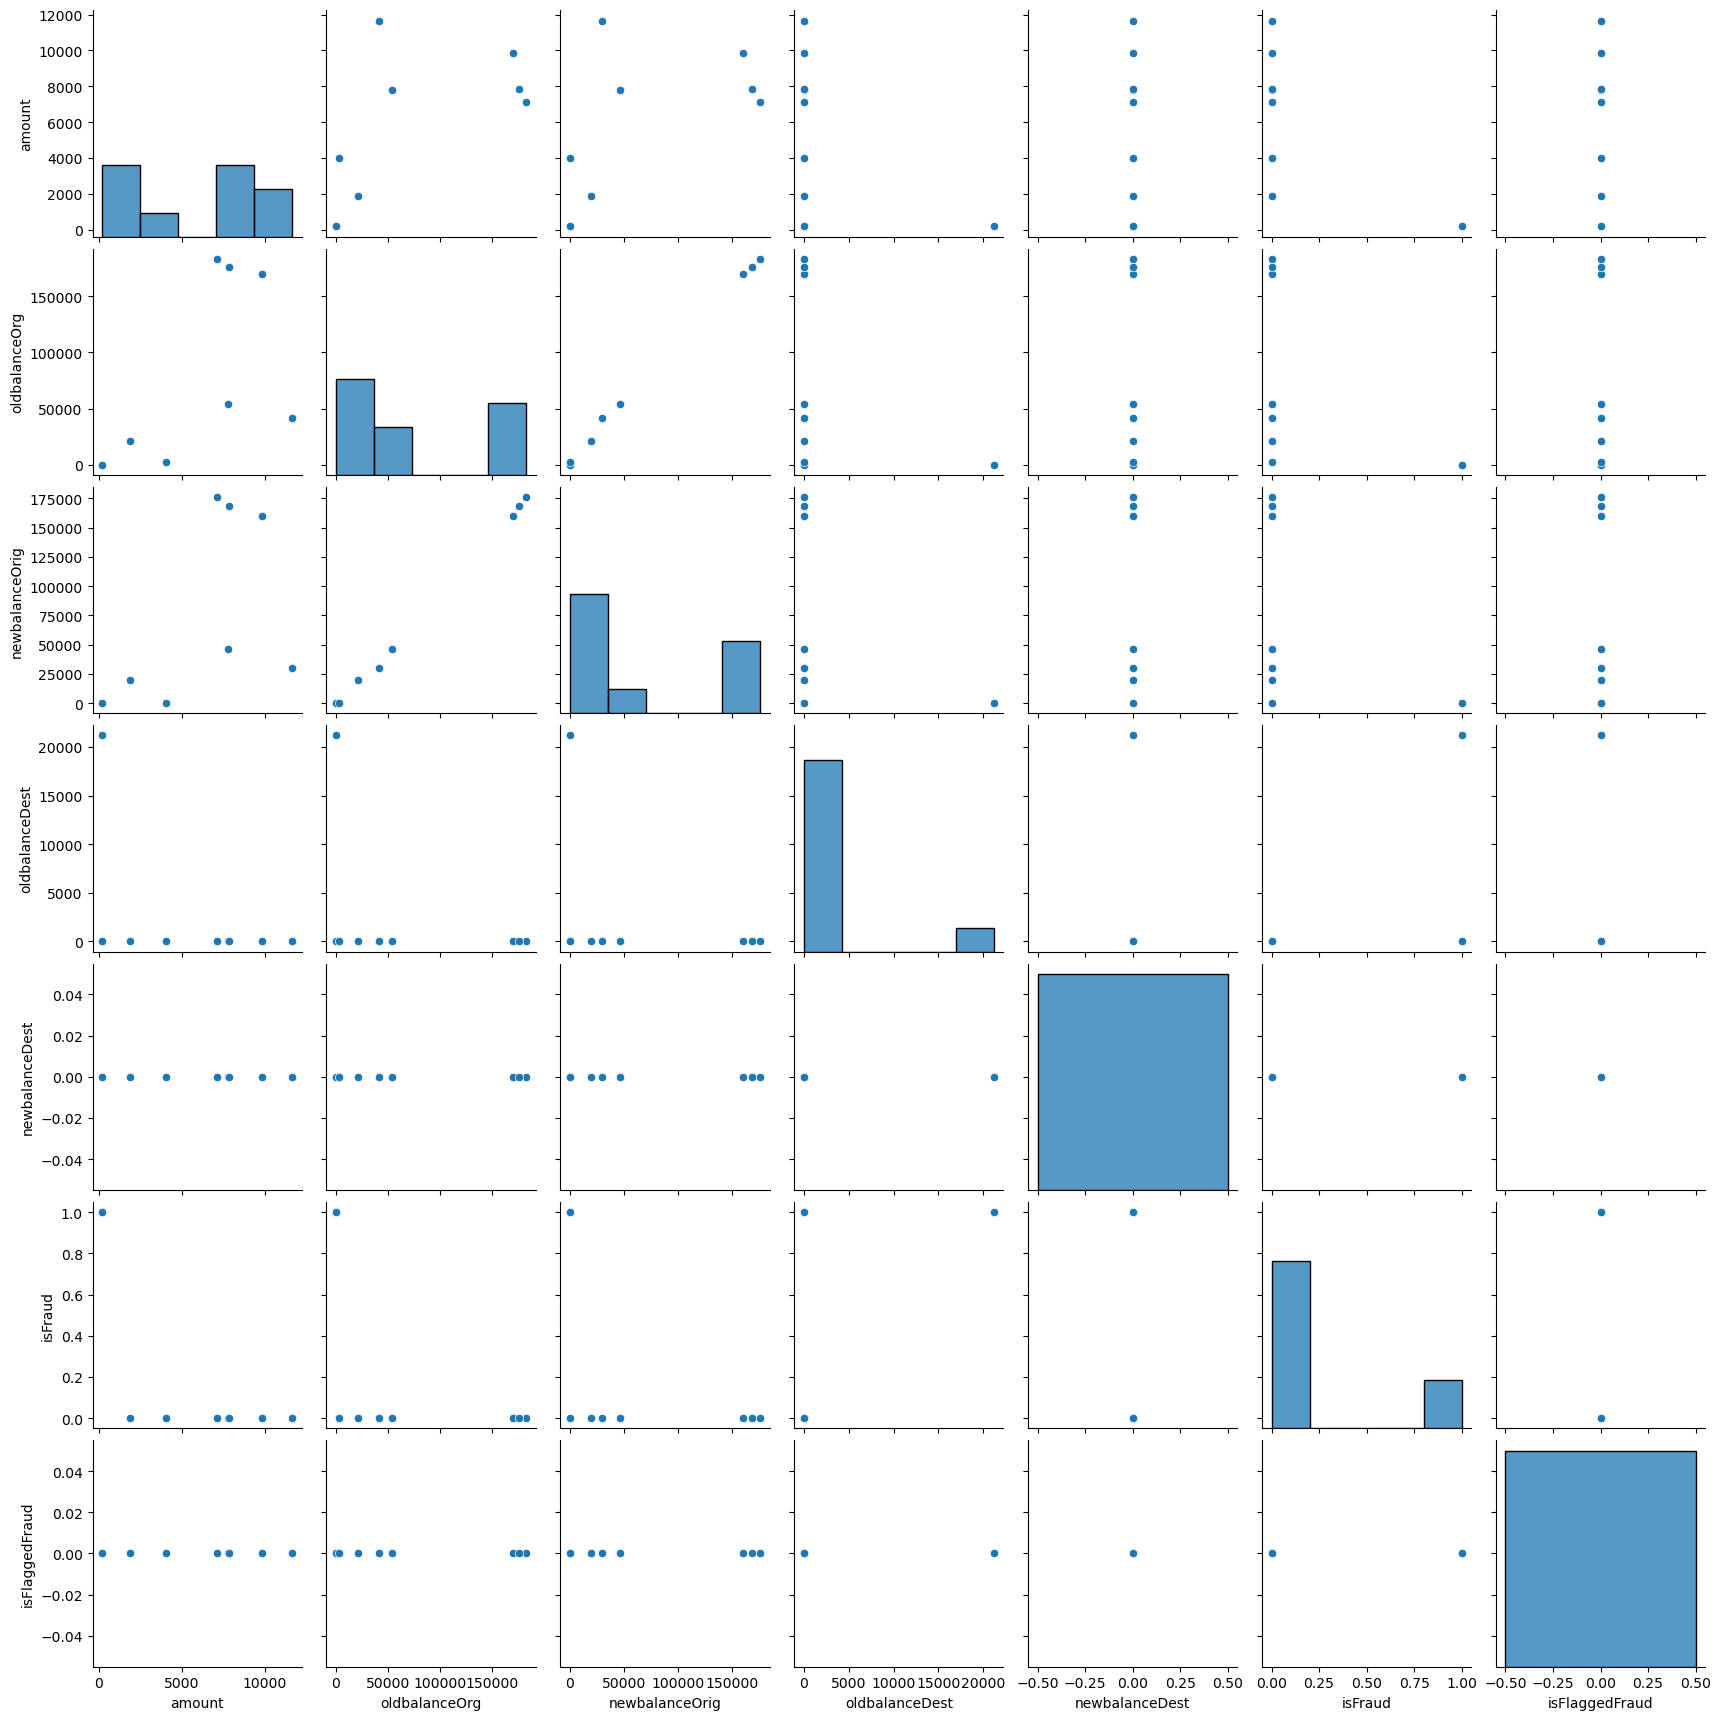

In [18]:
sns.pairplot(df.iloc[:9,:11])

833883.1040744866

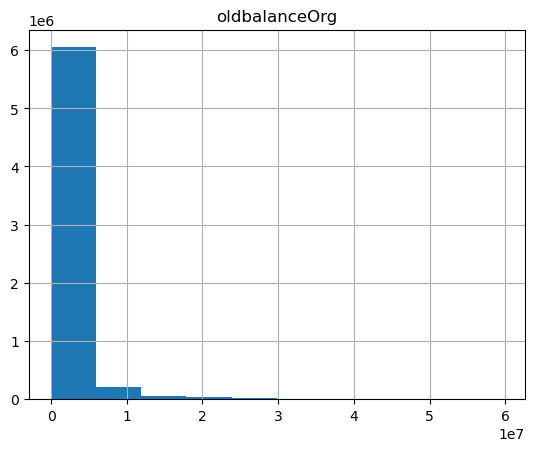

In [19]:
#plot histograms
df.hist(column = ["oldbalanceOrg"])
df["oldbalanceOrg"].mean()

The oldbalance Org  is most frequent between 0 and 3

855113.6685785869

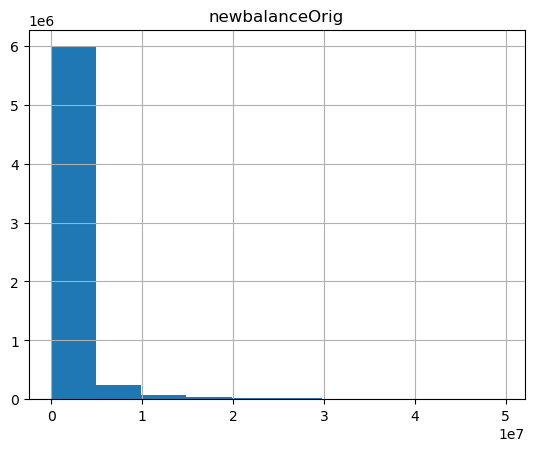

In [21]:
df.hist(column = ["newbalanceOrig"])
df["newbalanceOrig"].mean()

The newbalance Org  is most frequent between 0 and 3

1100701.6665196486

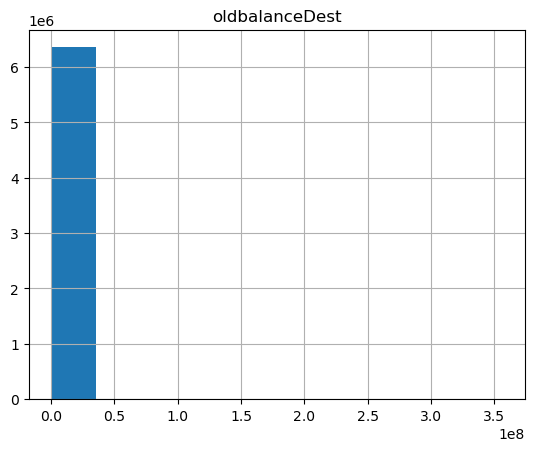

In [22]:
df.hist(column = ["oldbalanceDest"])
df["oldbalanceDest"].mean()

The oldbalanceDest  is most frequent between 0 and 0.4

1224996.3982019299

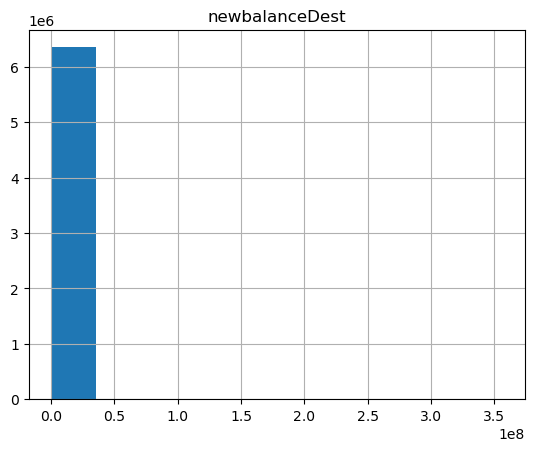

In [23]:
df.hist(column = ["newbalanceDest"])
df["newbalanceDest"].mean()

The newbalanceDest  is most frequent between 0 and 0.4

2.51468734577894e-06

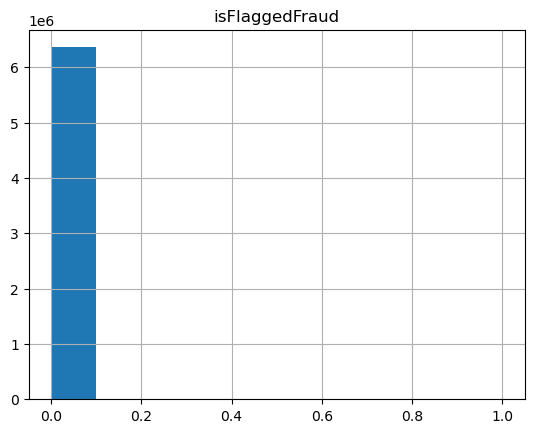

In [24]:
df.hist(column = ["isFlaggedFraud"])
df["isFlaggedFraud"].mean()

The isFlaggedFraud  is most frequent between 0 and 0.1

0.001290820448180152

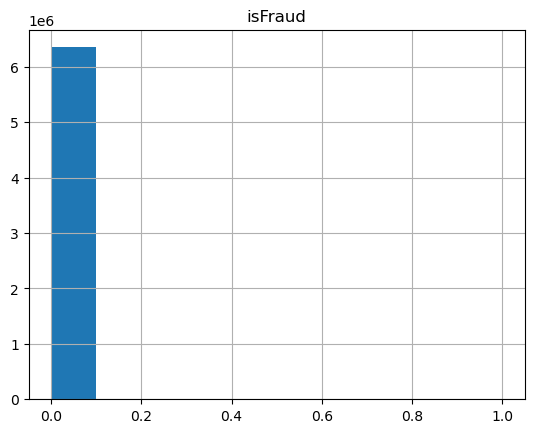

In [25]:
df.hist(column = ["isFraud"])
df["isFraud"].mean()

The isFraud  is most frequent between 0 and 0.1

0.001290820448180152

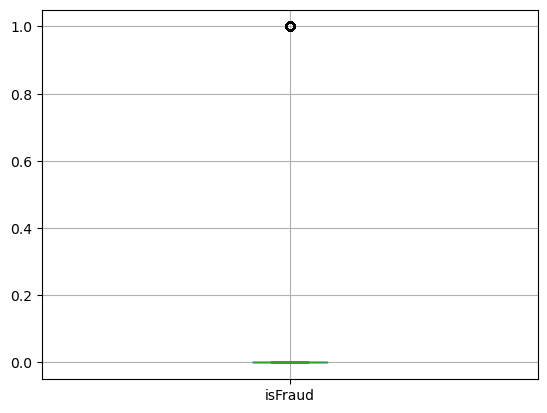

In [26]:
df.boxplot(column= ["isFraud"])
df["isFraud"].mean()


2.51468734577894e-06

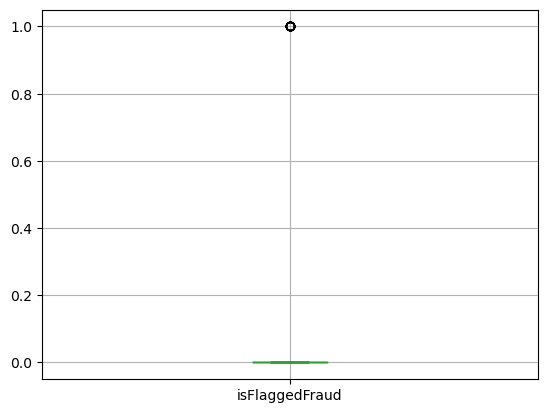

In [27]:
df.boxplot(column= ["isFlaggedFraud"])
df["isFlaggedFraud"].mean()

1224996.3982019299

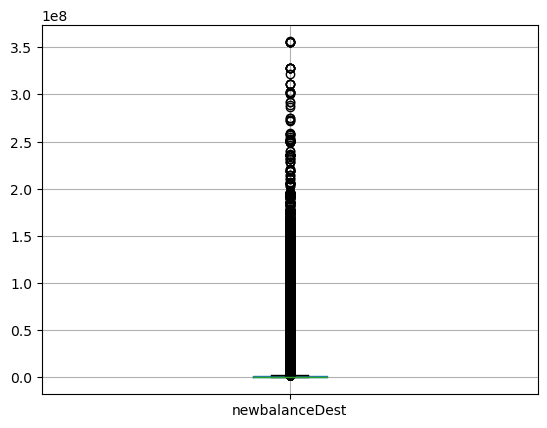

In [28]:
df.boxplot(column= ["newbalanceDest"])
df["newbalanceDest"].mean()

1100701.6665196486

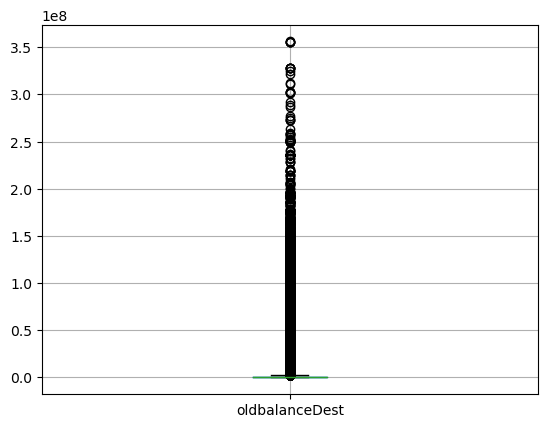

In [29]:
df.boxplot(column= ["oldbalanceDest"])
df["oldbalanceDest"].mean()

855113.6685785869

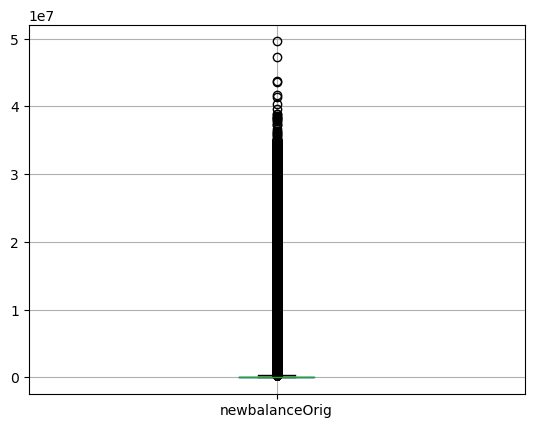

In [30]:
df.boxplot(column= ["newbalanceOrig"])
df["newbalanceOrig"].mean()

833883.1040744866

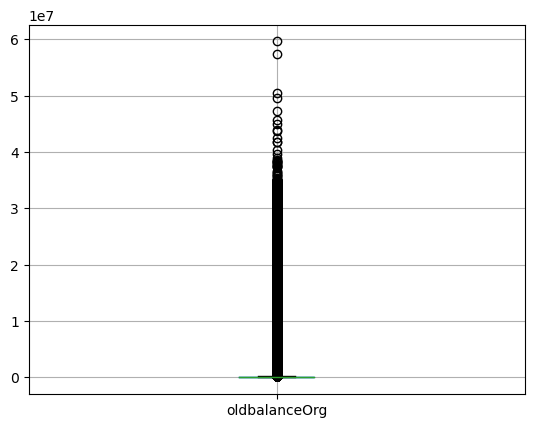

In [31]:
df.boxplot(column= ["oldbalanceOrg"])
df["oldbalanceOrg"].mean()

In [ ]:
df.boxplot(column= ["oldbalanceOrg"])
df["oldbalanceOrg"].mean()

<Axes: xlabel='isFlaggedFraud', ylabel='oldbalanceOrg'>

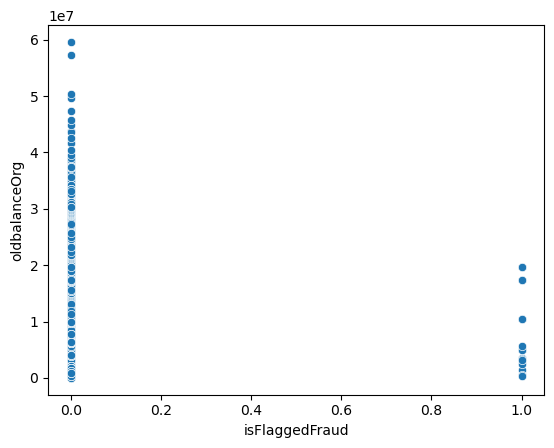

In [32]:
sns.scatterplot(data=df, x= 'isFlaggedFraud', y="oldbalanceOrg")


I did this comparsing because I want to see the correlation between what is flagged fraud and old balance org and there is no correlation.

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

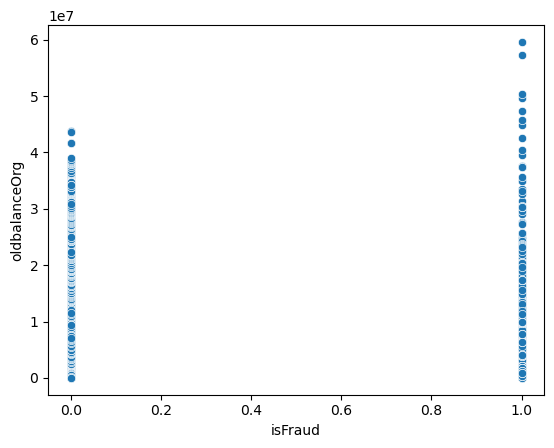

In [33]:
sns.scatterplot(data=df, x= 'isFraud', y="oldbalanceOrg")


I did this comparsing because I want to see the correlation between what is actually fraud and old balance org and there is no correlation.

<Axes: xlabel='isFlaggedFraud', ylabel='newbalanceOrig'>

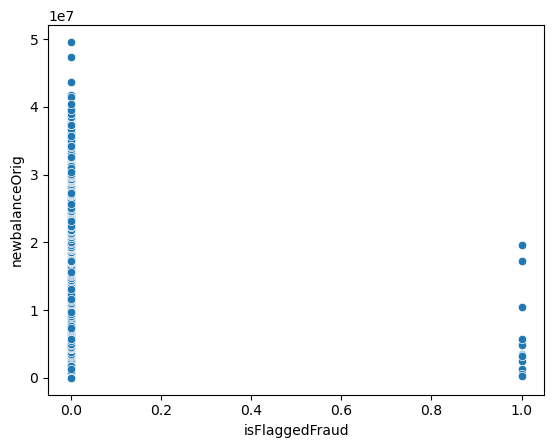

In [35]:

sns.scatterplot(data=df, x= 'isFlaggedFraud', y="newbalanceOrig")


I did this comparsing because I want to see the correlation between what is flagged fraud and new balance org and there is no correlation.

<Axes: xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

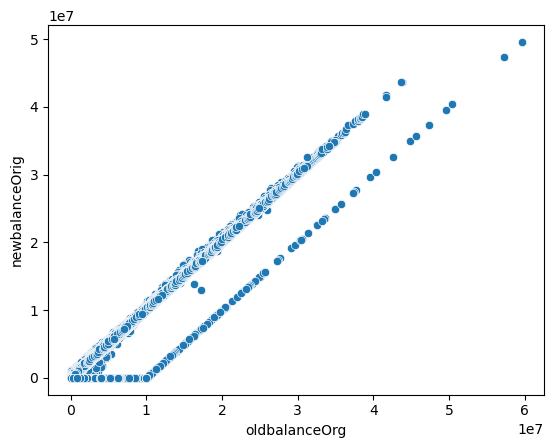

In [36]:
sns.scatterplot(data=df, x= 'oldbalanceOrg', y="newbalanceOrig")


I did this comparsing because I want to see the correlation between oldbalanceorgi and new balance org and there is an intrestingly positive correlation.

<Axes: xlabel='amount', ylabel='newbalanceOrig'>

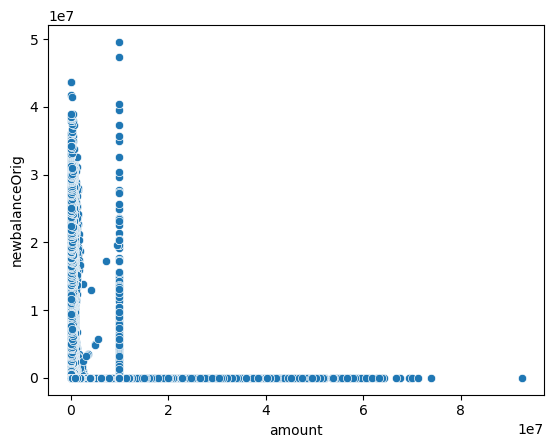

In [37]:
sns.scatterplot(data=df, x= 'amount', y="newbalanceOrig")


I did this comparsing because I want to see the correlation between newbalanceorgi and amount and there is no correlation.

<Axes: xlabel='isFraud', ylabel='isFlaggedFraud'>

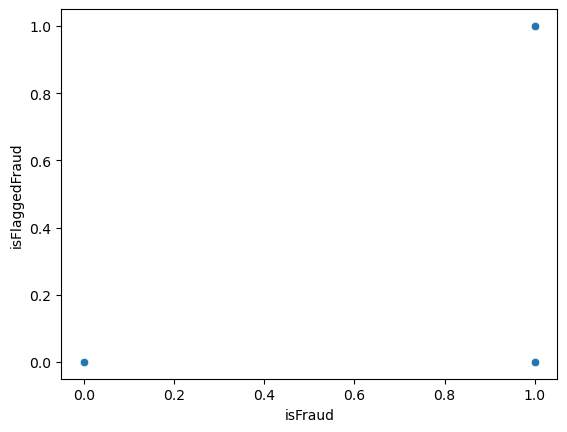

In [38]:
sns.scatterplot(data=df, x= 'isFraud', y="isFlaggedFraud")


I did this comparsing because I want to see the correlation between isFraud and isflaggedfraud there is no correlation.

Given an early preview in the pairplot we have an early insight to the correlation and there is no correlation beteween most columns other than between the old balance orgi and the new balance org

Data cleaning

Earlier, I already dropped a column I deemed was not necessary in this EDA but we will progress futher and so some more cleaning as necessary.

In [39]:
df.isna()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False


In [40]:
# Count how many total null values we have
df.isna().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

We have no null values so this is looking good so far. There are no null nor missing values so we do not have to drop anything.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [42]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [44]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Univerate analysis.

I will be taking a look at the data frame of a few columns so I can be able to understant what type of distrubution it is.



array([[<Axes: title={'center': 'newbalanceOrig'}>]], dtype=object)

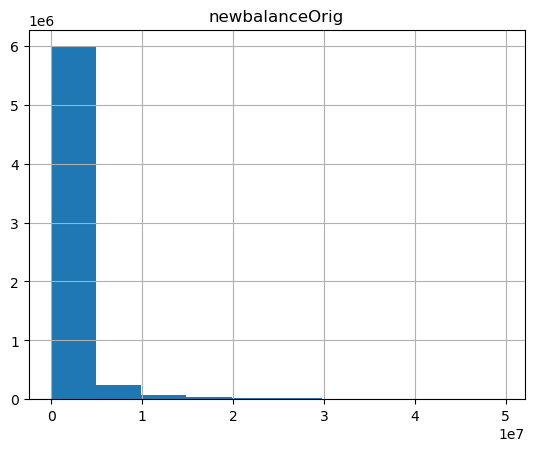

In [48]:
df.hist(column = ["newbalanceOrig"])


I will be using bins to increase the size to be able to get a more "detailed" look. By increasing the number of bins, the more detail we can see.

<Axes: ylabel='Frequency'>

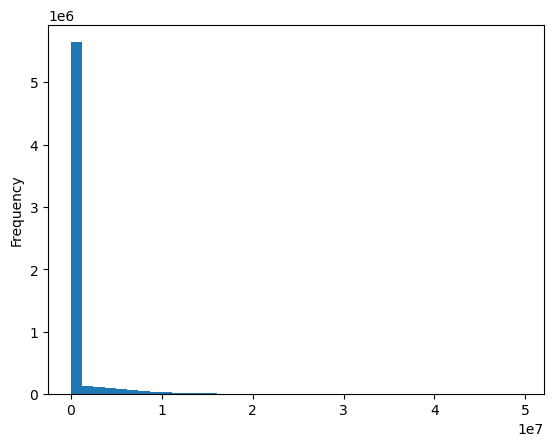

In [49]:
df["newbalanceOrig"].plot.hist(bins=40)


I can can clearly see that this is a right skewed graph (negatively skewed). This means there are fewer data plots are found to the right of the graph (toward the smaller numeric values). The "tail" of the graph is pulled toward the right .

In [52]:
#Lets plot out the distribution of our metrics and take a look
df_newbalanceOrig_median = round(df['newbalanceOrig'].median(), 2)

fig = plt.figure(figsize=(12, 12))
df['newbalanceOrig'].plot(kind='density')
plt.axvline(df_newbalanceOrig_median, c='r')
plt.annotate('Median: ' + str(df_newbalanceOrig_median),
             xy=(df_newbalanceOrig_median, plt.ylim()[1] * 0.75),
             xytext=(df_newbalanceOrig_median + plt.xlim()[1] * 0.1, plt.ylim()[1] * 0.8),
             textcoords='data',
             xycoords='data',
             arrowprops=dict(arrowstyle='->', lw=3, color='r'),
             fontweight='bold', fontsize='large')

plt.xlim(0, 140000)
plt.xticks(np.arange(0, 140000, 500))
plt.xlabel('newbalanceOrig')
plt.show()

**Observation**


Hypothesis: I hypothsize that there is no correlation between "isFraud" and "NewbalanceOrig".
 Null hypothsis: There is a correlation between shares and likes in a post.

There is a positive correlation between oldbalanceOrig and newbalanceOrig